In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt


In [2]:
stock_a = pd.read_csv('../individual_stocks_5yr/individual_stocks_5yr/A_data.csv')
stock_b = pd.read_csv('../individual_stocks_5yr/individual_stocks_5yr/LNT_data.csv')

In [3]:
stock_a.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A


In [4]:
stock_b.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,23.140,23.210,23.0502,23.190,495972,LNT
1,2013-02-11,23.205,23.300,23.1250,23.255,530144,LNT
2,2013-02-12,23.220,23.415,23.2200,23.320,643436,LNT
3,2013-02-13,23.340,23.420,23.2250,23.305,874582,LNT
4,2013-02-14,23.265,23.560,23.1300,23.500,1191670,LNT


In [5]:
stock_a.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,49.187863,49.600059,48.782026,49.202025,2.338039e+06
std,9.244798,9.264168,9.197698,9.229804,1.400161e+06
min,33.180000,34.060000,33.115000,33.370000,5.328630e+05
25%,41.515000,41.870000,41.260000,41.560000,1.533018e+06
50%,46.640000,47.000000,46.341000,46.700000,2.003109e+06
75%,56.435000,56.935000,56.025000,56.495000,2.718401e+06
max,74.480000,75.000000,74.300000,74.820000,1.814641e+07


In [6]:
stock_b.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,32.785743,33.021742,32.542765,32.786640,1.230026e+06
std,5.934214,5.963851,5.899969,5.950278,1.527472e+06
min,23.140000,23.210000,23.050200,17.870000,2.932130e+05
25%,28.117500,28.387500,27.862500,28.155000,8.510420e+05
50%,31.110000,31.345000,30.853800,31.140000,1.093769e+06
75%,38.245000,38.550000,37.835000,38.235000,1.405287e+06
max,45.300000,45.550000,44.870000,45.180000,5.188082e+07


In [7]:
stock_b.open.dtype

dtype('float64')

In [8]:
b_dates = stock_b.date.unique()
a_dates = stock_a.date.unique()

In [9]:
res = [ele for ele in b_dates if ele not in a_dates]
res

[]

In [10]:
indices = [i for i in range(len(stock_a.index)) if i %30 == 0 or i == stock_a.index[-1]]
len(indices)

43

In [11]:
change = []
dates = []
for i in range(len(indices)-1):
    opening = indices[i]
    closing = indices[i+1]
    change.append(stock_a.open.iloc[closing] - stock_a.close.iloc[opening])
for i in range(len(indices)):
    dates.append(stock_a.date.iloc[indices[i]])

In [12]:
def percent_change(stock_df):
    indices = [i for i in range(len(stock_df.index)) if i %30 == 0 or i == stock_df.index[-1]]
    change = []
    for i in range(len(indices)-1):
        opening = indices[i]
        closing = indices[i+1]
        change.append((stock_df.close.iloc[closing] - stock_df.open.iloc[opening] / stock_df.open.iloc[opening]))
    return change

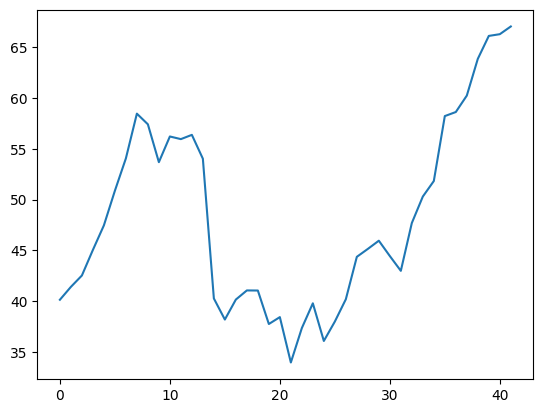

In [13]:
plt.plot(percent_change(stock_a))

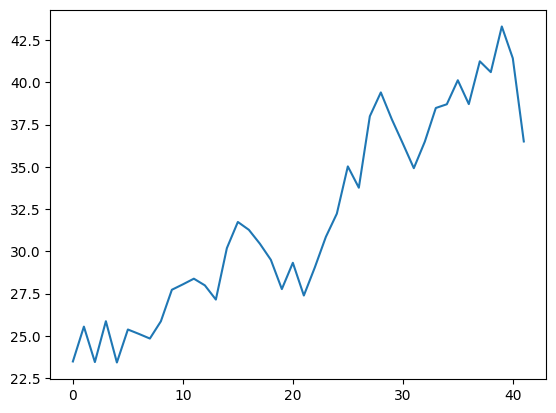

In [14]:
plt.plot(percent_change(stock_b))

In [15]:
stocks = pd.concat([stock_a, stock_b], ignore_index=True)
stocks['daily_change'] = stocks['close'] - stocks['open']
stocks.head()

,date,open,high,low,close,volume,Name,daily_change
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A,0.01
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A,-0.57
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A,-0.19
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A,-0.06
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A,-0.14


In [16]:
stock_a['daily_change'] = 100*(stock_a['close'] - stock_a['open'])/stock_a['open']
stock_b['daily_change'] = 100*(stock_b['close'] - stock_b['open'])/stock_b['open']

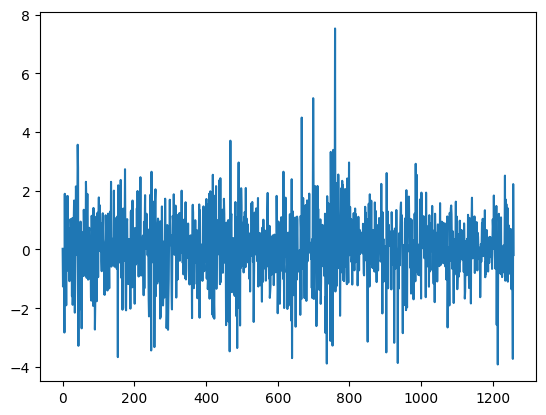

In [17]:
plt.plot(stock_a['daily_change'])

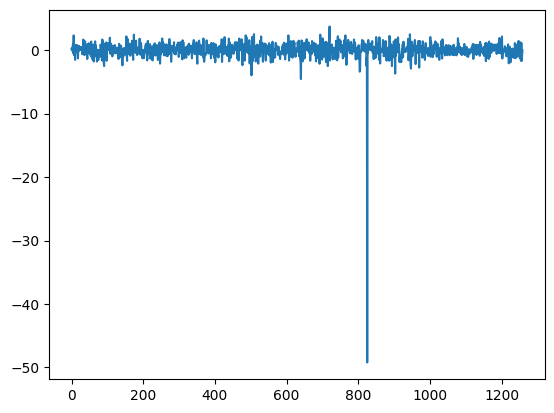

In [18]:
plt.plot(stock_b['daily_change'])

In [19]:
corr = stock_a['close'].corr(stock_b['close'])

In [20]:
corr

0.3885908374184039

In [ ]:
def correlation(stock_a, stock_b):
    corr = stock_a['close'].corr(stock_b['close'])
    return corr

def csv_loader(filepath):
    filenames = os.listdir(filepath)
    csv_names = [filename for filename in filenames if filename.endswith('.csv')]
    csv_files = []
    for name in csv_names:
        csv_files.append(pd.read_csv(filepath+name))
    return csv_files